# 北原ゼミ（2024年）1班　進捗報告

In [1]:
import pandas as pd
import numpy as np

## 前処理

In [2]:
original_data = pd.read_csv("data/panel.csv", encoding="utf-8")

In [3]:
cleaned_data = original_data.copy()
cleaned_data.head()

,Year,Continent,Country,ln_Visitors,ln_GDP (LCU),ln_GDP (USD'15),ln_Real Exchange Rate
0,2010,Oceania,Australia,12.327,28.2,27.797,-4.939
1,2011,Oceania,Australia,11.999,28.2,27.821,-5.091
2,2012,Oceania,Australia,12.238,28.2,27.859,-5.112
3,2013,Oceania,Australia,12.407,28.3,27.885,-5.062
4,2014,Oceania,Australia,12.620,28.3,27.911,-4.992


In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   324 non-null    int64  
 1   Continent              324 non-null    object 
 2   Country                324 non-null    object 
 3   ln_Visitors            324 non-null    float64
 4   ln_GDP (LCU)           324 non-null    float64
 5   ln_GDP (USD'15)        324 non-null    float64
 6   ln_Real Exchange Rate  324 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 17.8+ KB


In [5]:
cleaned_data['Continent'] = cleaned_data['Continent'].astype("category")
cleaned_data['Country'] = cleaned_data['Country'].astype("category")
cleaned_data['Year'] = cleaned_data['Year'].astype("category")
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Year                   324 non-null    category
 1   Continent              324 non-null    category
 2   Country                324 non-null    category
 3   ln_Visitors            324 non-null    float64 
 4   ln_GDP (LCU)           324 non-null    float64 
 5   ln_GDP (USD'15)        324 non-null    float64 
 6   ln_Real Exchange Rate  324 non-null    float64 
dtypes: category(3), float64(4)
memory usage: 13.0 KB


### 欠損値

In [6]:
cleaned_data.isna().sum()

Year                     0
Continent                0
Country                  0
ln_Visitors              0
ln_GDP (LCU)             0
ln_GDP (USD'15)          0
ln_Real Exchange Rate    0
dtype: int64

## 重複データ

In [7]:
cleaned_data.duplicated(subset=["ln_Visitors", "ln_GDP (LCU)", "ln_GDP (USD'15)", "ln_Real Exchange Rate"]).sum()

0

## 基本統計量

In [8]:
cleaned_data.describe()

,ln_Visitors,ln_GDP (LCU),ln_GDP (USD'15),ln_Real Exchange Rate
count,324.000000,324.000000,324.00000,324.000000
mean,11.911815,29.844444,27.71288,-2.486799
std,1.698281,2.639014,1.25345,3.018168
min,8.226000,26.100000,25.90100,-5.391000
25%,10.644250,28.200000,26.58325,-4.850750
50%,11.858000,28.700000,27.79750,-3.244000
75%,12.959000,30.700000,28.30025,-1.546750
max,16.077000,37.000000,30.71200,4.895000


## 可視化

In [9]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [10]:
sns.set_palette("pastel")

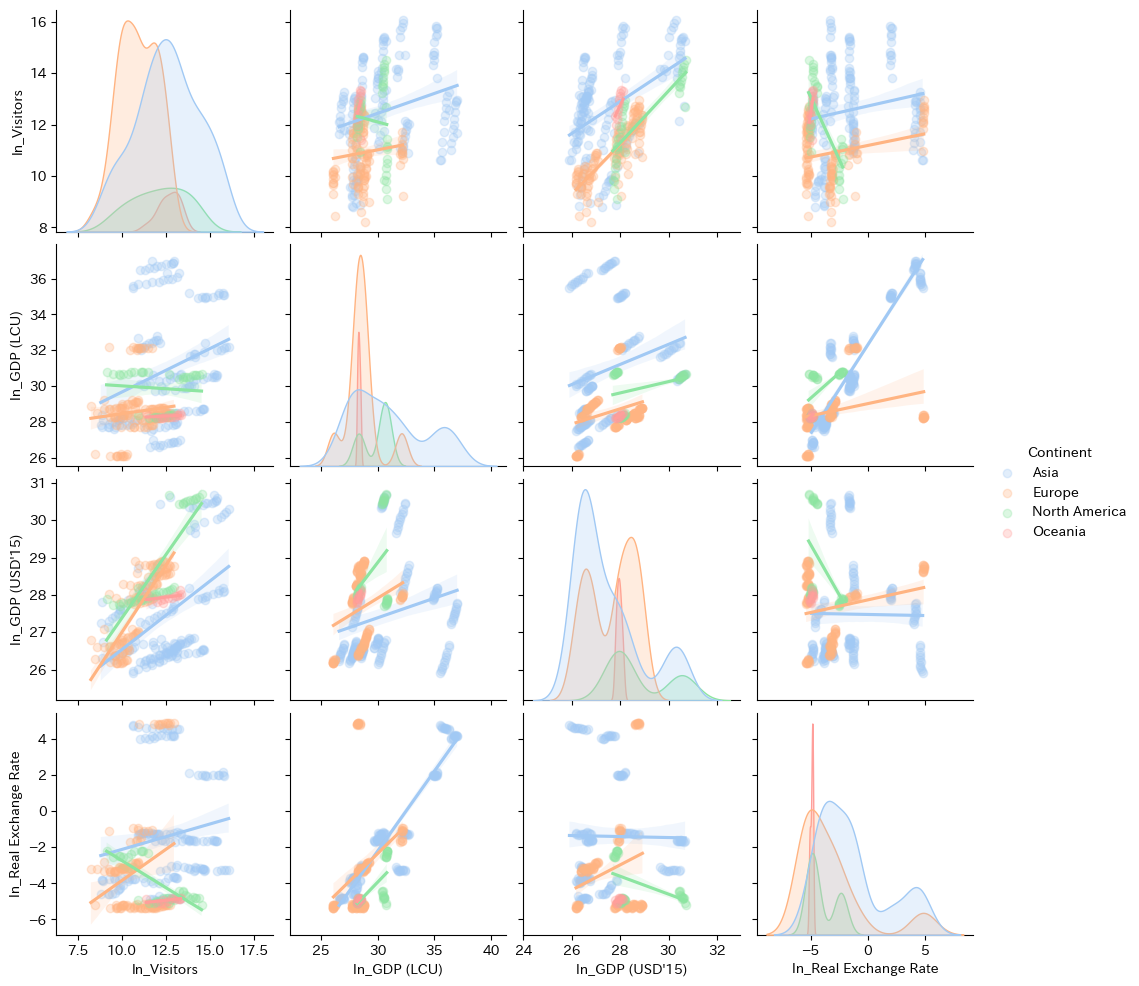

In [11]:
sns.pairplot(cleaned_data, hue="Continent", kind="reg", plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

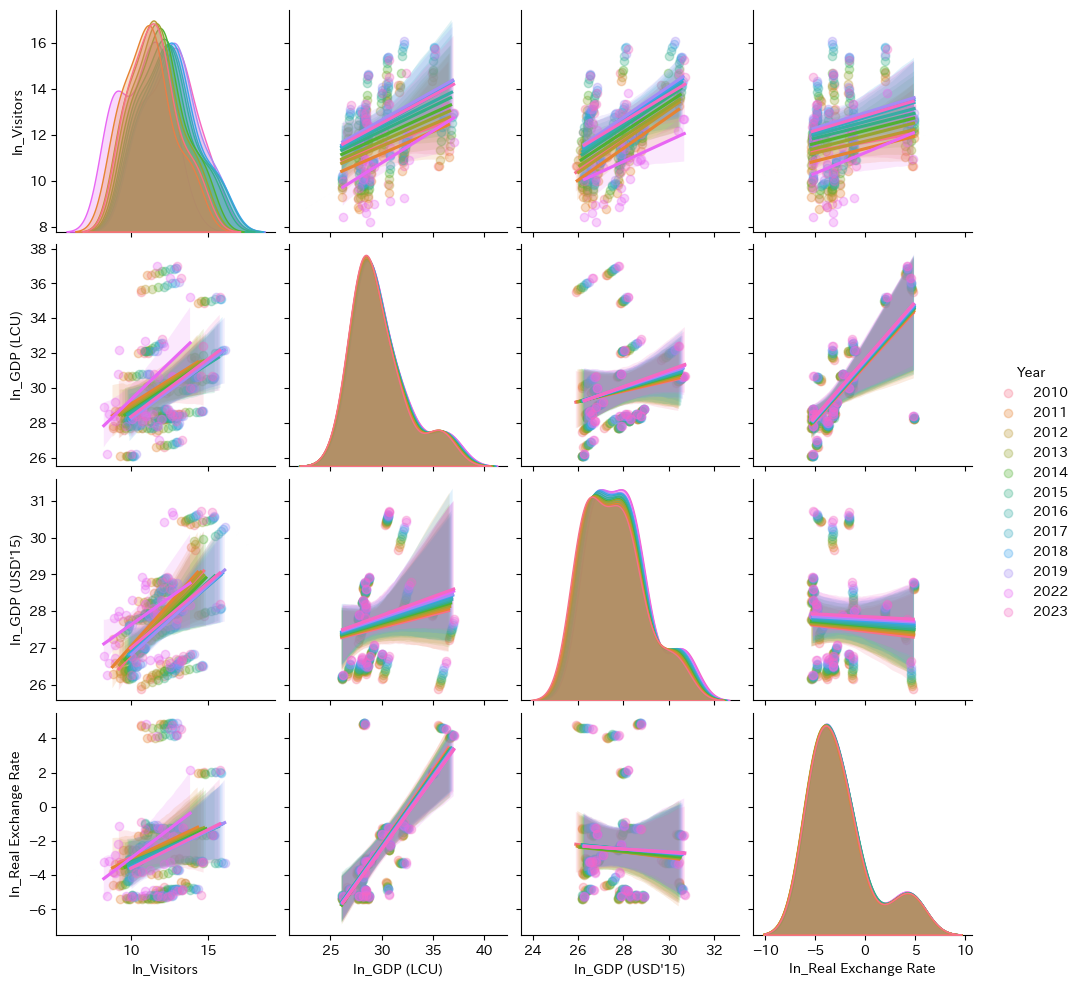

In [12]:
sns.pairplot(cleaned_data, hue="Year", kind="reg", plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

## 回帰モデル

In [13]:
import statsmodels.api as sm

In [14]:
lr = cleaned_data.copy()

### ダミー変数の作成

In [15]:
lr['D_Year'] = lr['Year']
lr['D_Continent'] = lr['Continent']
lr['D_Country'] = lr['Country']

In [16]:
lr = pd.get_dummies(lr, drop_first=True, columns=['D_Year', 'D_Continent', 'D_Country'], dtype=int)

In [17]:
with pd.option_context("display.max_columns", None):
    print(lr)

     Year Continent    Country  ln_Visitors  ln_GDP (LCU)  ln_GDP (USD'15)  \
0    2010   Oceania  Australia       12.327          28.2           27.797   
1    2011   Oceania  Australia       11.999          28.2           27.821   
2    2012   Oceania  Australia       12.238          28.2           27.859   
3    2013   Oceania  Australia       12.407          28.3           27.885   
4    2014   Oceania  Australia       12.620          28.3           27.911   
..    ...       ...        ...          ...           ...              ...   
319  2017      Asia   Viet Nam       12.641          36.0           26.333   
320  2018      Asia   Viet Nam       12.871          36.0           26.405   
321  2019      Asia   Viet Nam       13.112          36.1           26.476   
322  2022      Asia   Viet Nam       12.557          36.3           26.607   
323  2023      Asia   Viet Nam       13.260          36.3           26.656   

     ln_Real Exchange Rate  D_Year_2011  D_Year_2012  D_Year_20

### OLS

In [18]:
import statsmodels.api as sm

In [19]:
y = lr['ln_Visitors']
X = lr.drop(['ln_Visitors', "Year","Continent", "Country", "ln_GDP (LCU)"], axis=1)
X = sm.add_constant(X)

In [20]:
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_Visitors   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     385.2
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          7.30e-223
Time:                        04:28:21   Log-Likelihood:                 15.096
No. Observations:                 324   AIC:                             49.81
Df Residuals:                     284   BIC:                             201.0
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -29.3313      5.130     -5.717      0.000     -39.429     -19.233
ln_GDP (USD'15)                    1.5437      0.200      7.713      0.000       1.150       1.938
ln_Real Exchange Rate             -0.4988      0.135     -3.682      0.000      -0.765      -0.232
D_Year_2011                       -0.4559      0.068     -6.698      0.000      -0.590      -0.322
D_Year_2012                       -0.1546      0.069     -2.252      0.025      -0.290      -0.019
D_Year_2013                        0.0059      0.070      0.084      0.933      -0.132       0.144
D_Year_2014                        0.1974      0.072      2.758      0.006       0.057       0.338
D_Year_2015                        0.4456      0.075      5.943      0.000       0.298       0.593
D_Year_2016                        0.5624      0.078      7.182      0.000       0.408       0.716
D_Year_2017                        0.6272      0.082      7.682      0.000       0.466       0.788
D_Year_2018                        0.6821      0.085      8.015      0.000       0.515       0.850
D_Year_2019                        0.7525      0.089      8.496      0.000       0.578       0.927
D_Year_2022                       -1.1931      0.095    -12.573      0.000      -1.380      -1.006
D_Year_2023                        0.5059      0.099      5.124      0.000       0.312       0.700
D_Continent_Europe                -3.8380      0.339    -11.332      0.000      -4.505      -3.171
D_Continent_North America         -3.9025      0.462     -8.447      0.000      -4.812      -2.993
D_Continent_Oceania               -3.7814      0.552     -6.852      0.000      -4.868      -2.695
D_Country_Canada                  -0.5609      0.211     -2.662      0.008      -0.976      -0.146
D_Country_China                   -4.1435      0.825     -5.020      0.000      -5.768      -2.519
D_Country_Denmark                  0.3287      0.221      1.490      0.137      -0.106       0.763
D_Country_Finland                 -0.3109      0.423     -0.735      0.463      -1.143       0.522
D_Country_France                  -1.5665      0.342     -4.576      0.000      -2.240      -0.893
D_Country_Germany                 -2.3078      0.379     -6.088      0.000      -3.054      -1.562
D_Country_Hong Kong SAR, China     0.5934      0.214      2.769      0.006       0.172       1.015
D_Country_India                   -3.8212      0.512     -7.469      0.000      -4.828      -2.814
D_Country_Indonesia                0.9086      0.896      1.013      0.312      -0.856       2.673
D_Country_Israel                  -3.6998      0.290    -12.770      0.000      -4.270      -3.129
D_Country_Italy                   -1.9510      0.321     -6.078      0.000      -2.583      -1.319
D_Country_Kore

## Zipf Plot

In [21]:
zipf = pd.read_csv("data/visitors_ranking_19.csv", encoding="utf-8")
zipf.head()

,Ranking,Country,Visitors,log_Ranking,log_Visitors
0,1,中国,9594394,0.000,6.982
1,2,韓国,5584597,0.301,6.747
2,3,台湾,4890602,0.477,6.689
3,4,香港,2290792,0.602,6.360
4,5,米国,1723861,0.699,6.237


In [22]:
zipf.tail()

,Ranking,Country,Visitors,log_Ranking,log_Visitors
39,40,ノルウェー,24838,1.602,4.395
40,41,トルコ,22724,1.613,4.356
41,42,その他北アメリカ,16689,1.623,4.222
42,43,その他オセアニア,5832,1.633,3.766
43,44,無国籍・その他,728,1.643,2.862


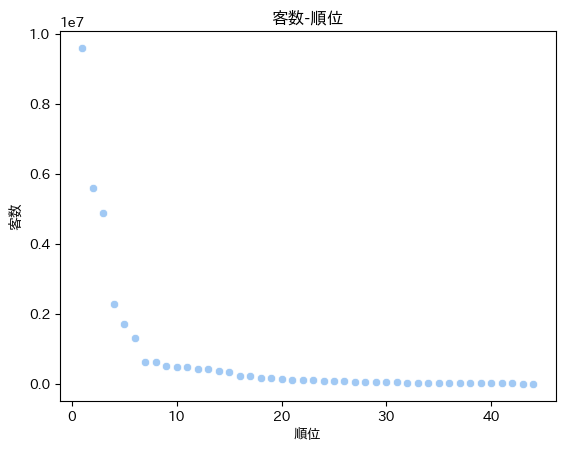

In [23]:
sns.scatterplot(zipf, x="Ranking", y="Visitors")
plt.title("客数-順位")
plt.xlabel("順位")
plt.ylabel("客数")
plt.show()

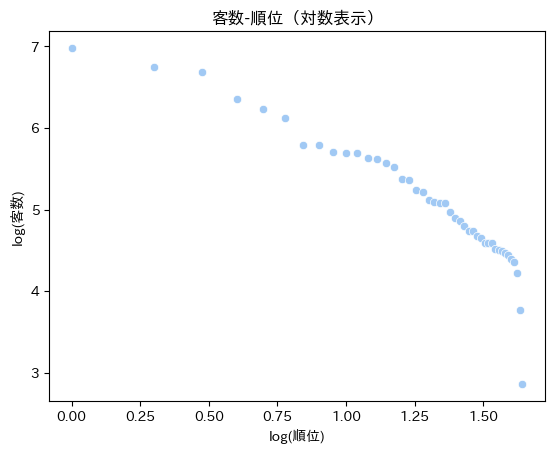

In [24]:
sns.scatterplot(zipf, x="log_Ranking", y="log_Visitors")
plt.title("客数-順位（対数表示）")
plt.xlabel("log(順位)")
plt.ylabel("log(客数)")
plt.show()

$Visitors = k \cdot (Ranking)^{-\alpha}$

$\log (Visitors) = -\alpha \log (Ranking) + \log (k)$

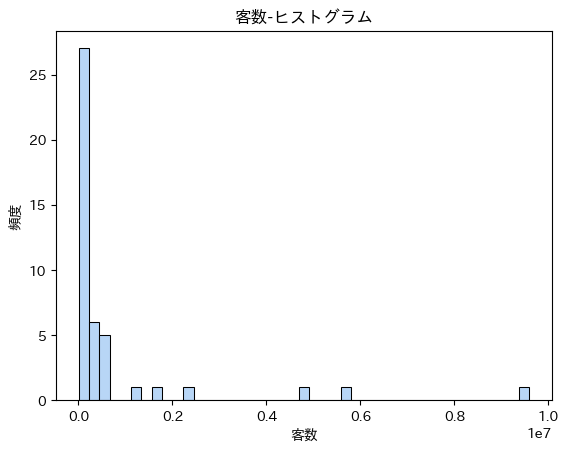

In [25]:
sns.histplot(zipf, x="Visitors")
plt.title("客数-ヒストグラム")
plt.xlabel("客数")
plt.ylabel("頻度")
plt.show()